Preprocessing : lowercasing, expand repeated words, slang normalization

### Load Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./Dataset/dataset_sarkasme.xlsx')

In [4]:
df['text'][0]

'Mungkin mereka lupa, presiden itu produk politik yang mengakar dari partai politik. Kalau seorang presiden mendukung kader yang diusung partai politiknya, lalu salahnya dimana?  This is how politics works!'

### EDA

In [5]:
class_counts = df['sarcasm'].value_counts()

print("Class counts:")
print(class_counts)

Class counts:
sarcasm
0    2200
1    2200
Name: count, dtype: int64


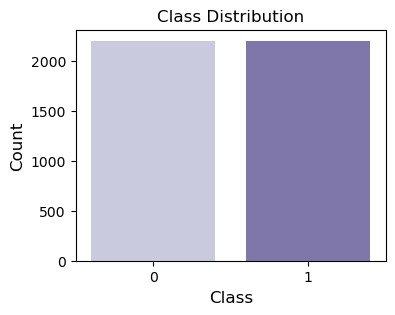

In [12]:
class_counts = df['sarcasm'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 3))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Purples")
plt.title("Class Distribution", fontsize=12)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

### Preprocessing

In [18]:
!pip install indoNLP

In [24]:
from indoNLP.preprocessing import replace_slang
import re

In [1]:
# Normalize whitespace and convert to lowercase

def lower_text(text):
    text = ' '.join(text.split()).lower()

    return text

In [3]:
# Expand Repeated Words

def expand_repeated_words(text):
    pattern = re.compile(r'\b([a-zA-Z]+)(\d)\b')
    
    def replace_match(match):
        word, number = match.groups()
        return f"{word}-{word}" if number == "2" else match.group(0)
    
    return pattern.sub(replace_match, text)

In [46]:
df['preprocessed_text'] = df['text'].apply(lower_text)
df['preprocessed_text'] = df['preprocessed_text'].apply(expand_repeated_words)
df['preprocessed_text'] = df['preprocessed_text'].apply(replace_slang)

In [47]:
df['preprocessed_text'][24]

'anies itu jujur sedang ngibul. dedy tau maka ia mengakak. mungkin yang dimaksud anies bio safety lab adalah tugu peti mati ayo tertawa ayo tertawa'

### Download New Dataset

In [50]:
# Select only the needed columns
new_df = df[['preprocessed_text', 'sarcasm']]

# Save to an Excel file
file_path = "./Dataset/dataset_sarkasme_new.xlsx"
new_df.to_excel(file_path, index=False)

print(f"File saved as {file_path}")

File saved as ./Dataset/dataset_sarkasme_new.xlsx
